In [1]:
import pandas as pd

Dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='2-class_balanced_rand')

In [2]:
#Dataset.drop(Dataset.iloc[:, 26:76], inplace = True, axis = 1)

#pd.set_option('display.max_columns', 10)

Dataset.head()

,Solvent name,SMILE,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,...,weinerPath,weinerPol,zagreb,BP,MP,Density_g-mL,Sol_25c,SS,Conc_mg-mL,CrysShape
0,Toluene,Cc1ccccc2,17.654345,1,1,0,0,0,0,6,...,42,5,30,110.6,-95.0,0.867,0.92,2.717391,2.500000,Needle
1,Methyl acetate,O=C(OC)C,10.884758,1,1,0,0,1,0,0,...,18,2,16,56.9,-98.0,0.932,10.71,1.832356,19.624536,Needle
2,2-Propanol,OC(C)C,11.416344,1,1,0,0,1,0,0,...,9,0,12,82.5,-89.0,0.790,5.97,1.487584,8.880879,Needle
3,Ethyl acetate,O=C(OCC)C,13.978344,1,1,0,0,1,0,0,...,32,3,20,77.1,-83.6,0.894,9.61,1.989156,19.115788,Polyhedral
4,Trichloroethylene,Cl/C(/Cl)=C\Cl,10.726793,1,1,0,0,0,0,0,...,18,2,16,74.0,-33.0,1.460,2.50,1.777007,4.442518,Polyhedral


In [3]:
print(Dataset.shape)

(164, 215)


In [4]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
outcomes = np.array(Dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
features = Dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
features_list = list(features.columns)
# Convert to numpy array
features_list = np.array(features_list)

# train/test split (75/25)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.8536585365853658
maximal accuracy = 1.0
mean accuracy = 0.9375609756097562
SD = 0.03845932359888198


# 4-fold Cross-validation

In [6]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [7]:
# Perform 4-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=4)
print ('Cross-validated scores:', scores)
print("average accuracy from 4-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.92682927 0.95121951 1.         0.85365854]
average accuracy from 4-fold CV: 0.9329268292682926
standard deviation of accuracy: 0.05280642706002675


# Confusion matrix

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[22  0]
 [ 3 16]]


In [9]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.88      1.00      0.94        22
  Polyhedral       1.00      0.84      0.91        19

    accuracy                           0.93        41
   macro avg       0.94      0.92      0.93        41
weighted avg       0.94      0.93      0.93        41



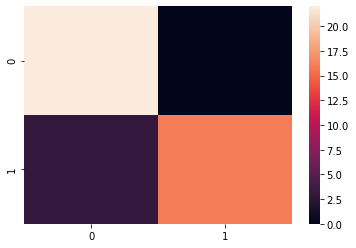

In [10]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

# train/test split (80/20)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.8181818181818182
maximal accuracy = 1.0
mean accuracy = 0.9360606060606059
SD = 0.042832451674368326


# 5-fold Cross-validation

In [12]:
# Perform 5-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=5)
print ('Cross-validated scores:', scores)
print("average accuracy from 5-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.90909091 0.96969697 0.93939394 1.         0.8125    ]
average accuracy from 5-fold CV: 0.9261363636363636
standard deviation of accuracy: 0.0643939393939394


# Confusion matrix

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[15  1]
 [ 3 14]]


In [14]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.83      0.94      0.88        16
  Polyhedral       0.93      0.82      0.87        17

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33



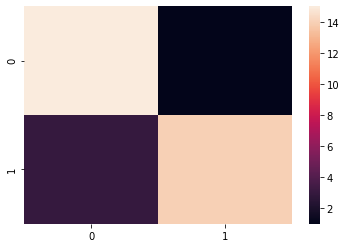

In [15]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

# train/test split (90/10)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.8235294117647058
maximal accuracy = 1.0
mean accuracy = 0.9547058823529412
SD = 0.04695208483013502


# 10-fold Cross-validation

In [17]:
# Perform 10-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=10)
print ('Cross-validated scores:', scores)
print("average accuracy from 10-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [1.         0.88235294 0.94117647 1.         0.875      1.
 1.         1.         0.9375     0.9375    ]
average accuracy from 10-fold CV: 0.9573529411764706
standard deviation of accuracy: 0.04748770556608095


# Confusion matrix

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 4  2]
 [ 0 11]]


In [19]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       1.00      0.67      0.80         6
  Polyhedral       0.85      1.00      0.92        11

    accuracy                           0.88        17
   macro avg       0.92      0.83      0.86        17
weighted avg       0.90      0.88      0.88        17



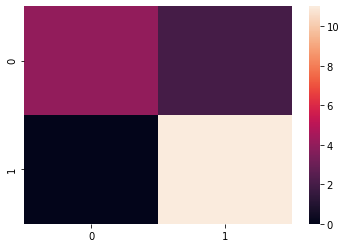

In [20]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()